**Problem Statement:** In this assignment, you are going segment/cluster different customers of a book lending store

**Dataset:** book_readers.csv

**Dataset Description: **

Each row is a customer. For each customer, we have their personal details like age, gender, race, marital status, etc. We have details about their book-reading habits

**Question**

  - Perform exploratory data analysis to understand the customers on various attributes
  - Identify if there are any missing value; Perform missing value treatment if required
  - Convert all categorical columns to numerical columns using appropriate techniques
  - Standardize the columns using Standard Scaler
  - Using K-Means algorithm cluster customers in to 4 different groups
  - Tag each customer with the cluster number
  - Plot number of customers for each cluster
  - For each cluster, identify the average values of the input variables and populate them in a table. Using background gradient styling technique to visualize this table

In [399]:
import pandas as pd

In [400]:
df = pd.read_csv("book_readers_data.csv")

In [401]:
df_original = pd.read_csv("book_readers_data.csv")

In [402]:
df

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,18,Male,White,Never been married,High school graduate,Employed part-time,"$75,000 to under $100,000",0,NaN,NaN,NaN,NaN,Yes,Yes
2828,17,Male,White,Never been married,High school incomplete,Employed part-time,"$30,000 to under $40,000",0,NaN,NaN,NaN,NaN,Yes,No
2829,17,Female,White,Never been married,High school incomplete,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,Yes
2830,16,Male,White,Never been married,High school graduate,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,No


In [403]:
df.rename(columns={"Age":"age", 
                   "Sex":"gender", 
                   "Race":"race",
                  "Marital status?":"marital_status",
                  "Education":"education",
                  "Employement":"employment",
                  "Incomes":"incomes",
                  "How many books did you read during last 12months?":"books_read",
                  "Read any printed books during last 12months?":"read_printed_books",
                  "Read any audiobooks during last 12months?":"read_audio_books",
                  "Read any e-books during last 12months?":"read_ebooks",
                  "Last book you read, you…":"last_read_book_by",
                  "Do you happen to read any daily news or newspapers?":"read_news",
                  "Do you happen to read any magazines or journals?":"read_journals"}, inplace=True)

In [404]:
df

,age,gender,race,marital_status,education,employment,incomes,books_read,read_printed_books,read_audio_books,read_ebooks,last_read_book_by,read_news,read_journals
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,18,Male,White,Never been married,High school graduate,Employed part-time,"$75,000 to under $100,000",0,NaN,NaN,NaN,NaN,Yes,Yes
2828,17,Male,White,Never been married,High school incomplete,Employed part-time,"$30,000 to under $40,000",0,NaN,NaN,NaN,NaN,Yes,No
2829,17,Female,White,Never been married,High school incomplete,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,Yes
2830,16,Male,White,Never been married,High school graduate,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,No


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 2832 non-null   int64 
 1   gender              2832 non-null   object
 2   race                2832 non-null   object
 3   marital_status      2832 non-null   object
 4   education           2832 non-null   object
 5   employment          2832 non-null   object
 6   incomes             2832 non-null   object
 7   books_read          2832 non-null   int64 
 8   read_printed_books  2442 non-null   object
 9   read_audio_books    2442 non-null   object
 10  read_ebooks         2442 non-null   object
 11  last_read_book_by   2442 non-null   object
 12  read_news           2832 non-null   object
 13  read_journals       2832 non-null   object
dtypes: int64(2), object(12)
memory usage: 309.9+ KB


In [406]:
def value_marking(value):
    readkey = {
                "Yes":"y", 
                "No":"n", 
                "Don’t know":"dn", 
                "Purchased the book":"purchased", 
                "Borrowed the book from a friend or family member":"borrowed_friend",
                "NA":"na",
                "Borrowed the book from a library":"borrowed_library",
                "Got the book some other way":"other_way",
                "8":"other_way",
                "9":"other_way",
                "Female":"female",
                "Male":"male",
                "White":"white",
                "Black or African-American":"black",
                "Asian or Pacific Islander":"asian",
                "Mixed race":"mixed",
                "Other":"other",
                "Refused":"refused",
                "Native American/American Indian":"native",
                "Married":"married",
                "Never been married":"never_married",
                "Divorced":"divorced",
                "Widowed":"widowed",
                "Living with a partner":"livin",
                "Single":"single",
                "Separated":"separated",
                "High school graduate":"hscc",
                "Some college, no 4-year degree":"college_no_4year_degree",
                "College graduate":"college_graduate",
                "Post-graduate training/professional school after college":"",
                "High school incomplete":"hscc_incomplete",
                "Some college, no 4-year degree":"college_no_4year_degree",
                "College graduate":"college_graduate",
                "Post-graduate training/professional school after college":"post_graduate_training_post_college",
                "High school incomplete":"hscc_incomplete",
                "Technical, trade or vocational school AFTER high school":"vocational_school_post_hscc",
                "None":"na",
                "Employed full-time":"employed",
                "Retired":"retired",                             
                "Not employed for pay":"not_employed_for_pay",                
                "Employed part-time":"employed_part",                  
                "Disabled":"disabled",                             
                "Have own business/self-employed":"employed_self",      
                "Student":"student"
              }
    marking = readkey[value]
    return marking
    

In [407]:
def bookread(read):
    read1 = read[0]
    read2 = read[1]
    return_val = read2
    if read1==0:
        return_val = "n"
    else:
        return_val = value_marking(read2)
    return return_val

In [408]:
df["read_printed_books"] = df[["books_read","read_printed_books"]].apply(bookread, axis=1)
df["read_audio_books"] = df[["books_read","read_audio_books"]].apply(bookread, axis=1)
df["read_ebooks"] = df[["books_read","read_ebooks"]].apply(bookread, axis=1)
df["last_read_book_by"] = df[["books_read","last_read_book_by"]].apply(bookread, axis=1)
df["read_news"] = df["read_news"].apply(value_marking)
df["read_journals"] = df["read_journals"].apply(value_marking)

In [409]:
df["read_printed_books"].value_counts()

y     2264
n      558
dn      10
Name: read_printed_books, dtype: int64

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 2832 non-null   int64 
 1   gender              2832 non-null   object
 2   race                2832 non-null   object
 3   marital_status      2832 non-null   object
 4   education           2832 non-null   object
 5   employment          2832 non-null   object
 6   incomes             2832 non-null   object
 7   books_read          2832 non-null   int64 
 8   read_printed_books  2832 non-null   object
 9   read_audio_books    2832 non-null   object
 10  read_ebooks         2832 non-null   object
 11  last_read_book_by   2832 non-null   object
 12  read_news           2832 non-null   object
 13  read_journals       2832 non-null   object
dtypes: int64(2), object(12)
memory usage: 309.9+ KB


In [411]:
def val_counts(columns):
    for col in columns:
        print(df[col].value_counts())

In [412]:
val_counts(["books_read", "read_printed_books", "read_audio_books", "read_ebooks", "last_read_book_by", "read_news", "read_journals"])

0     390
3     209
6     172
2     169
5     167
4     166
10    162
20    159
12    159
1     149
97    124
30    109
50    108
15    103
25     82
8      69
40     53
7      49
24     35
60     19
36     16
35     15
96     15
75     14
13     12
16     11
9      11
70     10
18     10
14      9
45      7
17      6
80      6
48      5
11      4
55      3
32      3
47      2
90      2
26      2
65      2
52      2
19      1
84      1
76      1
51      1
42      1
43      1
54      1
38      1
67      1
37      1
23      1
22      1
Name: books_read, dtype: int64
y     2264
n      558
dn      10
Name: read_printed_books, dtype: int64
n     2417
y      411
dn       4
Name: read_audio_books, dtype: int64
n     2031
y      787
dn      14
Name: read_ebooks, dtype: int64
purchased           1266
borrowed_friend      501
n                    390
other_way            340
borrowed_library     335
Name: last_read_book_by, dtype: int64
y     1750
n     1077
dn       5
Name: read_news, dtype: in

In [413]:
df

,age,gender,race,marital_status,education,employment,incomes,books_read,read_printed_books,read_audio_books,read_ebooks,last_read_book_by,read_news,read_journals
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,y,n,y,purchased,n,y
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,y,y,y,purchased,y,y
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,n,y,y,borrowed_friend,y,y
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,y,n,y,borrowed_library,y,n
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,y,y,n,purchased,y,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,18,Male,White,Never been married,High school graduate,Employed part-time,"$75,000 to under $100,000",0,n,n,n,n,y,y
2828,17,Male,White,Never been married,High school incomplete,Employed part-time,"$30,000 to under $40,000",0,n,n,n,n,y,n
2829,17,Female,White,Never been married,High school incomplete,Not employed for pay,"9$100,000 to under $150,000",0,n,n,n,n,n,y
2830,16,Male,White,Never been married,High school graduate,Not employed for pay,"9$100,000 to under $150,000",0,n,n,n,n,n,n


In [414]:
df["gender"].value_counts()

Female    1479
Male      1353
Name: gender, dtype: int64

In [415]:
df["race"].value_counts()

White                              2217
Black or African-American           347
Asian or Pacific Islander            70
Mixed race                           63
Other                                58
Refused                              37
Native American/American Indian      31
Don’t know                            9
Name: race, dtype: int64

In [416]:
df["marital_status"].value_counts()

Married                  1532
Never been married        592
Divorced                  245
Widowed                   191
Living with a partner     141
Single                     60
Separated                  54
Don’t know                 17
Name: marital_status, dtype: int64

In [417]:
df["education"].value_counts()

High school graduate                                        688
Some college, no 4-year degree                              651
College graduate                                            597
Post-graduate training/professional school after college    501
High school incomplete                                      263
Technical, trade or vocational school AFTER high school      66
None                                                         58
Don’t know                                                    8
Name: education, dtype: int64

In [418]:
df["employment"].value_counts()

Employed full-time                 1238
Retired                             605
Not employed for pay                474
Employed part-time                  355
Disabled                             70
Have own business/self-employed      53
Student                              22
Other                                15
Name: employment, dtype: int64

In [419]:
df["incomes"].value_counts()

$100,000 to under $150,000     530
$50,000 to under $75,000       394
$75,000 to under $100,000      316
Refused                        291
$30,000 to under $40,000       265
$20,000 to under $30,000       238
$10,000 to under $20,000       216
9$100,000 to under $150,000    212
$40,000 to under $50,000       207
Less than $10,000              163
Name: incomes, dtype: int64

In [420]:
import re
import numpy as np

In [421]:
def clean_income(income):
    re_exp = "[\S]*\$([0-9\,]+)[a-z\s]*\$*([0-9\,]*)|(Refused)"
    matched = re.findall(pattern=re_exp, string=income)
    return matched[0]

In [422]:
df["incomes_min"] = pd.to_numeric(df["incomes"].apply(clean_income).apply(lambda x: re.sub(",", "", x[0]))).fillna(0)

In [423]:
df["incomes_max"] = pd.to_numeric(df["incomes"].apply(clean_income).apply(lambda x: re.sub(",", "", x[1]))).fillna(0)

In [424]:
df.drop(columns="incomes", inplace=True)

In [425]:
df["incomes_max"].value_counts()

150000.0    742
0.0         454
75000.0     394
100000.0    316
40000.0     265
30000.0     238
20000.0     216
50000.0     207
Name: incomes_max, dtype: int64

In [426]:
df

,age,gender,race,marital_status,education,employment,books_read,read_printed_books,read_audio_books,read_ebooks,last_read_book_by,read_news,read_journals,incomes_min,incomes_max
0,66,Male,Refused,Divorced,College graduate,Retired,97,y,n,y,purchased,n,y,20000.0,30000.0
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,97,y,y,y,purchased,y,y,10000.0,0.0
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,97,n,y,y,borrowed_friend,y,y,10000.0,0.0
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,97,y,n,y,borrowed_library,y,n,40000.0,50000.0
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,97,y,y,n,purchased,y,n,10000.0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,18,Male,White,Never been married,High school graduate,Employed part-time,0,n,n,n,n,y,y,75000.0,100000.0
2828,17,Male,White,Never been married,High school incomplete,Employed part-time,0,n,n,n,n,y,n,30000.0,40000.0
2829,17,Female,White,Never been married,High school incomplete,Not employed for pay,0,n,n,n,n,n,y,100000.0,150000.0
2830,16,Male,White,Never been married,High school graduate,Not employed for pay,0,n,n,n,n,n,n,100000.0,150000.0


In [427]:
val_counts(colstocode)

Female    1479
Male      1353
Name: gender, dtype: int64
White                              2217
Black or African-American           347
Asian or Pacific Islander            70
Mixed race                           63
Other                                58
Refused                              37
Native American/American Indian      31
Don’t know                            9
Name: race, dtype: int64
Married                  1532
Never been married        592
Divorced                  245
Widowed                   191
Living with a partner     141
Single                     60
Separated                  54
Don’t know                 17
Name: marital_status, dtype: int64
High school graduate                                        688
Some college, no 4-year degree                              651
College graduate                                            597
Post-graduate training/professional school after college    501
High school incomplete                                      263
Tec

In [428]:
df["gender"] = df["gender"].apply(value_marking)

In [429]:
df["race"] = df["race"].apply(value_marking)

In [430]:
df["marital_status"] = df["marital_status"].apply(value_marking)

In [431]:
df["education"] = df["education"].apply(value_marking)

In [432]:
df["employment"] = df["employment"].apply(value_marking)

In [433]:
val_counts(colstocode)

female    1479
male      1353
Name: gender, dtype: int64
white      2217
black       347
asian        70
mixed        63
other        58
refused      37
native       31
dn            9
Name: race, dtype: int64
married          1532
never_married     592
divorced          245
widowed           191
livin             141
single             60
separated          54
dn                 17
Name: marital_status, dtype: int64
hscc                                   688
college_no_4year_degree                651
college_graduate                       597
post_graduate_training_post_college    501
hscc_incomplete                        263
vocational_school_post_hscc             66
na                                      58
dn                                       8
Name: education, dtype: int64
employed                1238
retired                  605
not_employed_for_pay     474
employed_part            355
disabled                  70
employed_self             53
student                   22
ot

In [434]:
df

,age,gender,race,marital_status,education,employment,books_read,read_printed_books,read_audio_books,read_ebooks,last_read_book_by,read_news,read_journals,incomes_min,incomes_max
0,66,male,refused,divorced,college_graduate,retired,97,y,n,y,purchased,n,y,20000.0,30000.0
1,46,male,native,married,hscc,employed,97,y,y,y,purchased,y,y,10000.0,0.0
2,32,male,mixed,never_married,hscc,employed,97,n,y,y,borrowed_friend,y,y,10000.0,0.0
3,27,male,mixed,married,hscc,employed,97,y,n,y,borrowed_library,y,n,40000.0,50000.0
4,16,female,mixed,never_married,hscc_incomplete,employed_part,97,y,y,n,purchased,y,n,10000.0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,18,male,white,never_married,hscc,employed_part,0,n,n,n,n,y,y,75000.0,100000.0
2828,17,male,white,never_married,hscc_incomplete,employed_part,0,n,n,n,n,y,n,30000.0,40000.0
2829,17,female,white,never_married,hscc_incomplete,not_employed_for_pay,0,n,n,n,n,n,y,100000.0,150000.0
2830,16,male,white,never_married,hscc,not_employed_for_pay,0,n,n,n,n,n,n,100000.0,150000.0


In [435]:
df["education"][2829]

'hscc_incomplete'

In [436]:
dummify = ["gender", "race", "marital_status", "education", "employment", "read_printed_books", "read_audio_books", "read_ebooks", "last_read_book_by", "read_news", "read_journals"]

In [437]:
dummies = pd.get_dummies(df[dummify])

In [438]:
dummies

,gender_female,gender_male,race_asian,race_black,race_dn,race_mixed,race_native,race_other,race_refused,race_white,...,last_read_book_by_borrowed_library,last_read_book_by_n,last_read_book_by_other_way,last_read_book_by_purchased,read_news_dn,read_news_n,read_news_y,read_journals_dn,read_journals_n,read_journals_y
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2828,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
2829,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2830,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [439]:
df1 = pd.concat([df, dummies], axis=1)

In [440]:
df1.drop(columns=dummify, inplace=True)

In [441]:
df1

,age,books_read,incomes_min,incomes_max,gender_female,gender_male,race_asian,race_black,race_dn,race_mixed,...,last_read_book_by_borrowed_library,last_read_book_by_n,last_read_book_by_other_way,last_read_book_by_purchased,read_news_dn,read_news_n,read_news_y,read_journals_dn,read_journals_n,read_journals_y
0,66,97,20000.0,30000.0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,46,97,10000.0,0.0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,32,97,10000.0,0.0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,27,97,40000.0,50000.0,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
4,16,97,10000.0,20000.0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,18,0,75000.0,100000.0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2828,17,0,30000.0,40000.0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2829,17,0,100000.0,150000.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2830,16,0,100000.0,150000.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [442]:
from sklearn.preprocessing import StandardScaler

In [443]:
scalar = StandardScaler()

In [444]:
scaled_df = scalar.fit_transform(df1)

In [445]:
scaled_df

array([[ 1.00868855,  3.39953216, -0.83454968, ..., -0.03760887,
        -0.9356798 ,  0.93833794],
       [-0.06876773,  3.39953216, -1.1102022 , ..., -0.03760887,
        -0.9356798 ,  0.93833794],
       [-0.82298714,  3.39953216, -1.1102022 , ..., -0.03760887,
        -0.9356798 ,  0.93833794],
       ...,
       [-1.63107935, -0.70578434,  1.37067047, ..., -0.03760887,
        -0.9356798 ,  0.93833794],
       [-1.68495216, -0.70578434,  1.37067047, ..., -0.03760887,
         1.06874168, -1.06571413],
       [-1.68495216, -0.70578434, -1.38585472, ..., -0.03760887,
         1.06874168, -1.06571413]])

In [446]:
from sklearn.cluster import KMeans

In [447]:
kmeans = KMeans(n_clusters=4, init="k-means++")

In [448]:
kmeans.fit(scaled_df)

KMeans(n_clusters=4)

In [449]:
kmeans.cluster_centers_

array([[ 8.14519267e-02,  4.15291465e-01,  1.88905767e-01,
         1.87053339e-01,  2.85846391e-02, -2.85846391e-02,
        -1.31872414e-02, -1.43221183e-01,  3.30435601e-02,
         8.82733917e-02, -3.25769965e-02, -9.12447493e-02,
         1.06769066e-01,  9.29383645e-02, -9.26939497e-02,
        -1.24932540e-02, -5.51925343e-02,  2.69109563e-01,
        -1.73380646e-01, -1.02586055e-01, -4.21726380e-02,
        -1.78286104e-02,  1.68657080e-01,  3.43662046e-02,
        -5.32246295e-02, -2.90422444e-01, -1.89783154e-01,
        -1.09028998e-01,  3.15318809e-01, -3.76007019e-02,
        -9.43042430e-02,  1.29250384e-01, -2.86425528e-02,
         1.05998522e-02, -7.04911629e-02, -3.82685868e-02,
        -2.34214552e-02, -3.11016456e-02, -1.70637017e-02,
        -2.92713967e-01,  2.93293629e-01,  1.63603324e-01,
        -2.41331647e+00,  2.40558361e+00,  1.45001725e-01,
        -5.35305993e-01,  5.15492060e-01, -8.07439356e-02,
         2.42087092e-01, -3.99631280e-01, -5.13368066e-0

In [450]:
clusters = pd.DataFrame(kmeans.labels_, columns=["Cluster"])

In [451]:
clusters

,Cluster
0,3
1,0
2,0
3,3
4,2
...,...
2827,1
2828,1
2829,1
2830,1


In [452]:
df_clustered = pd.concat([clusters, df_original], axis=1)

In [453]:
df_clustered[df_clustered["Cluster"]==1]

,Cluster,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
348,1,57,Male,White,Single,High school graduate,Not employed for pay,"9$100,000 to under $150,000",40,No,No,No,Purchased the book,No,Yes
355,1,52,Female,White,Divorced,High school graduate,Not employed for pay,"Less than $10,000",40,No,No,No,Purchased the book,Yes,No
402,1,65,Female,White,Married,High school graduate,Retired,"$20,000 to under $30,000",35,No,No,Yes,Purchased the book,No,No
471,1,54,Female,White,Separated,None,Disabled,"Less than $10,000",30,No,No,No,Purchased the book,Yes,No
728,1,53,Female,White,Divorced,High school graduate,Employed part-time,"$10,000 to under $20,000",20,No,No,Yes,Purchased the book,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,1,18,Male,White,Never been married,High school graduate,Employed part-time,"$75,000 to under $100,000",0,NaN,NaN,NaN,NaN,Yes,Yes
2828,1,17,Male,White,Never been married,High school incomplete,Employed part-time,"$30,000 to under $40,000",0,NaN,NaN,NaN,NaN,Yes,No
2829,1,17,Female,White,Never been married,High school incomplete,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,Yes
2830,1,16,Male,White,Never been married,High school graduate,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,No


### Cluster Profiling

Formula for **Standard Deviation**
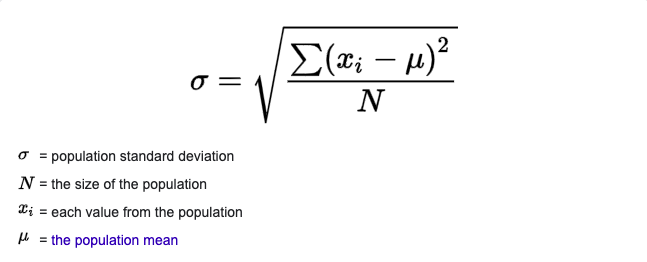

### Whar are z scores?
The above table shows the z-scores.
Formula for **Z-score:**
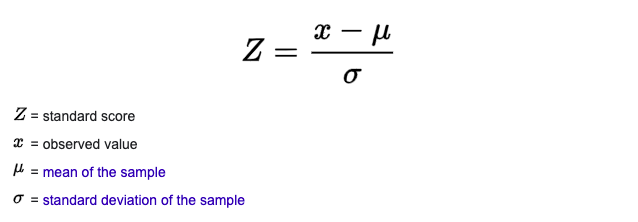

#### Method get_zprofiles(data, kmeans) explaination:
- This function takes the two arguments, 1st, data and 2nd the trained model instance. 
- In the first line the method is creating another column "Labels" in the data and assigning the labels for each rows (axis=0)
- In the second line, 
    - the data is now grouped by the "Labels" column to calculate the mean of each group ***(This is x in the above formula)***. 
    - Then the mean of the sample is substracted from the mean of group ***(This is mu in the above formula)***
    - Finally divide the result by standard deviation


In [489]:
test = df1[["age", "books_read", "incomes_min", "incomes_max"]].copy()
test["Labels"] = kmeans.labels_
testvar = test.groupby('Labels').mean()
testvar

,age,books_read,incomes_min,incomes_max
Labels,,,,
0,48.788413,26.488665,57128.463476,82581.863980
1,52.148492,0.758701,38909.512761,55301.624130
2,30.448326,14.615721,43806.404658,62707.423581
3,54.004556,20.002278,55303.720577,79848.139711


In [490]:
gmean = df1[["age", "books_read", "incomes_min", "incomes_max"]].mean()
gmean

age               47.276483
books_read        16.676201
incomes_min    50275.423729
incomes_max    72337.570621
dtype: float64

In [493]:
gstd = df1[["age", "books_read", "incomes_min", "incomes_max"]].std()
gstd

age               18.565516
books_read        23.632071
incomes_min    36283.963709
incomes_max    54776.367812
dtype: float64

In [492]:
testprofile = testvar.subtract(gmean, axis=1)
testprofile

,age,books_read,incomes_min,incomes_max
Labels,,,,
0,1.511930,9.812464,6853.039747,10244.293358
1,4.872009,-15.917500,-11365.910968,-17035.946492
2,-16.828157,-2.060480,-6469.019071,-9630.147041
3,6.728073,3.326077,5028.296848,7510.569090


In [495]:
testprofile = testprofile.divide(gstd, axis=1)
testprofile

,age,books_read,incomes_min,incomes_max
Labels,,,,
0,0.004386,0.017570,0.000005,0.000003
1,0.014135,-0.028502,-0.000009,-0.000006
2,-0.048823,-0.003689,-0.000005,-0.000003
3,0.019520,0.005956,0.000004,0.000003


In [454]:
def get_zprofiles(data,kmeans):
    data['Labels']=kmeans.labels_
    profile=data.groupby('Labels').mean().subtract(data.drop('Labels',axis=1).mean(),axis=1)
    profile=profile.divide(data.drop('Labels',axis=1).std(),axis=1)
    profile['Size']=data['Labels'].value_counts()
    return profile

In [479]:
profile = get_zprofiles(data=df1[["age", "books_read", "incomes_min", "incomes_max"]],kmeans=kmeans)

/var/folders/3r/hfw5ds7x10s2p6ps2ct8m4j40000gn/T/ipykernel_20171/4291421787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Labels']=kmeans.labels_


In [480]:
profile

,age,books_read,incomes_min,incomes_max,Size
Labels,,,,,
0,0.081438,0.415218,0.188872,0.187020,397
1,0.262422,-0.673555,-0.313249,-0.311009,431
2,-0.906420,-0.087190,-0.178289,-0.175808,687
3,0.362396,0.140744,0.138582,0.137113,1317


### Inferences (Cluster Profiling):
- **Label 0**:
    - age: 0.081438, 
    - books_read: 0.415218,
    - incomes_min: 0.188872,
    - incomes_max: 0.187020,
    - Size: 397
    - **Inference**: *These are young-aged peoples who are great-book readers and have highest-income range.*
- **Label 1**:
    - age: 0.262422, 
    - books_read: -0.673555,
    - incomes_min: -0.313249,
    - incomes_max: -0.311009,
    - Size: 431
    - **Inference**: *These are middle-aged peoples who are less-book readers and have very lowest-income range.*
- **Label 2**:
    - age: -0.906420, 
    - books_read: -0.087190,
    - incomes_min: -0.178289,
    - incomes_max: -0.175808,
    - Size: 687
    - **Inference**: *These are youngest-aged peoples who are average-book readers and have low-income range.*
- **Label 3**:
    - age: 0.362396, 
    - books_read: 0.140744,
    - incomes_min: 0.138582,
    - incomes_max: 0.137113,
    - Size: 1317
    - **Inference**: *These are old-aged peoples who are good-book readers and have high-income range.*

In [459]:
kmeans.inertia_

144074.86054950886

In [496]:
import matplotlib.pyplot as plt
%matplotlib inline

### Plotting number of customers for each cluster

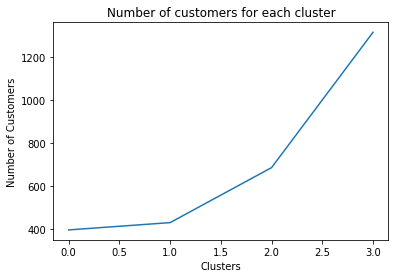

In [498]:
plt.plot(profile.index,profile["Size"])
plt.title('Number of customers for each cluster')
plt.xlabel('Clusters')
plt.ylabel('Number of Customers')
plt.show()

### For each cluster, identify the average values of the input variables and populate them in a table. Using background gradient styling technique to visualize this table

In [516]:
cmap_options = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']
profile.style.background_gradient(cmap='Blues',axis=0)

,age,books_read,incomes_min,incomes_max,Size
Labels,,,,,
0,0.081438,0.415218,0.188872,0.187020,397
1,0.262422,-0.673555,-0.313249,-0.311009,431
2,-0.906420,-0.087190,-0.178289,-0.175808,687
3,0.362396,0.140744,0.138582,0.137113,1317


In [519]:
import seaborn as sns

<AxesSubplot:ylabel='Labels'>

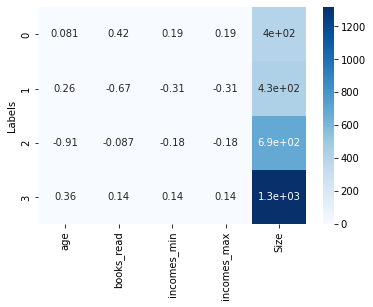

In [522]:
sns.heatmap(profile,cmap="Blues", annot=True, cbar=True)

### Now I am trying to see the best possible clusters using Elbow method (Very costly method)

In [466]:
## Elbow method
K=range(1,100)
wss = []
for k in K:
    kmeans2 = KMeans(n_clusters=k,init="k-means++")
    kmeans2.fit(scaled_df)
    wss.append(kmeans2.inertia_)

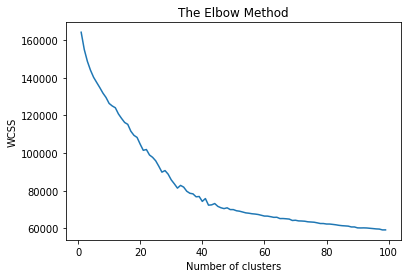

In [468]:
plt.plot(K,wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [469]:
kmeans40 = KMeans(n_clusters=40, init="k-means++")

In [470]:
kmeans40.fit(scaled_df)

KMeans(n_clusters=40)

In [471]:
clusters40 = pd.DataFrame(kmeans40.labels_, columns=["Cluster40"])

In [472]:
clusters40

,Cluster40
0,21
1,39
2,8
3,16
4,7
...,...
2827,35
2828,35
2829,7
2830,35


In [477]:
scaled_df40 = pd.concat([clusters40, df1], axis=1)

In [478]:
scaled_df40

,Cluster40,age,books_read,incomes_min,incomes_max,gender_female,gender_male,race_asian,race_black,race_dn,...,last_read_book_by_borrowed_library,last_read_book_by_n,last_read_book_by_other_way,last_read_book_by_purchased,read_news_dn,read_news_n,read_news_y,read_journals_dn,read_journals_n,read_journals_y
0,21,66,97,20000.0,30000.0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,39,46,97,10000.0,0.0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,8,32,97,10000.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,16,27,97,40000.0,50000.0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,7,16,97,10000.0,20000.0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,35,18,0,75000.0,100000.0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2828,35,17,0,30000.0,40000.0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2829,7,17,0,100000.0,150000.0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2830,35,16,0,100000.0,150000.0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [481]:
profile40 = get_zprofiles(data=df1[["age", "books_read", "incomes_min", "incomes_max"]],kmeans=kmeans40)

/var/folders/3r/hfw5ds7x10s2p6ps2ct8m4j40000gn/T/ipykernel_20171/4291421787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Labels']=kmeans.labels_


In [482]:
profile40

,age,books_read,incomes_min,incomes_max,Size
Labels,,,,,
0,-0.119487,-0.267745,0.192703,0.180219,86
1,-0.324606,-0.451767,0.784770,0.733207,4
2,-0.115103,-0.112916,0.496615,0.492977,129
3,0.466084,0.182963,-0.287076,-0.299159,142
4,-0.743877,-0.154327,-0.351427,-0.351078,103
5,0.041004,0.115897,0.125011,0.115774,53
6,-1.018545,0.044263,-0.494491,-0.473720,90
7,-1.572713,-0.000281,0.365074,0.380389,115
8,-0.005261,0.472445,0.614799,0.619863,151


#### Cluster Profiling

In [517]:
profile40.style.background_gradient(cmap='Blues',axis=0)

,age,books_read,incomes_min,incomes_max,Size
Labels,,,,,
0,-0.119487,-0.267745,0.192703,0.180219,86
1,-0.324606,-0.451767,0.784770,0.733207,4
2,-0.115103,-0.112916,0.496615,0.492977,129
3,0.466084,0.182963,-0.287076,-0.299159,142
4,-0.743877,-0.154327,-0.351427,-0.351078,103
5,0.041004,0.115897,0.125011,0.115774,53
6,-1.018545,0.044263,-0.494491,-0.473720,90
7,-1.572713,-0.000281,0.365074,0.380389,115
8,-0.005261,0.472445,0.614799,0.619863,151
